# Step 5-7
Choose task formulation for regression. Estimate multivariate correlation(target-predictors).

Target variable for regression will be 'Adj Close' column.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings(action='ignore')
data = pd.read_csv("data/NVIDIA Corporation.csv")

data.dropna()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1/22/1999,0.488281,0.388021,0.437500,0.410156,271468800,0.376518
1,1/25/1999,0.458333,0.410156,0.442708,0.453125,51048000,0.415963
2,1/26/1999,0.467448,0.411458,0.458333,0.417969,34320000,0.383690
3,1/27/1999,0.429688,0.395833,0.419271,0.416667,24436800,0.382495
4,1/28/1999,0.419271,0.412760,0.416667,0.415365,22752000,0.381300


Predictors, target variable

In [62]:
X = data[['High', 'Low', 'Open', 'Close']]
y = data[['Adj Close']]

# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

Metrics

In [63]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  0.10363594135986827
Mean squared error =  0.018913686940430812


Visualization

Text(0, 0.5, 'Adj Close')

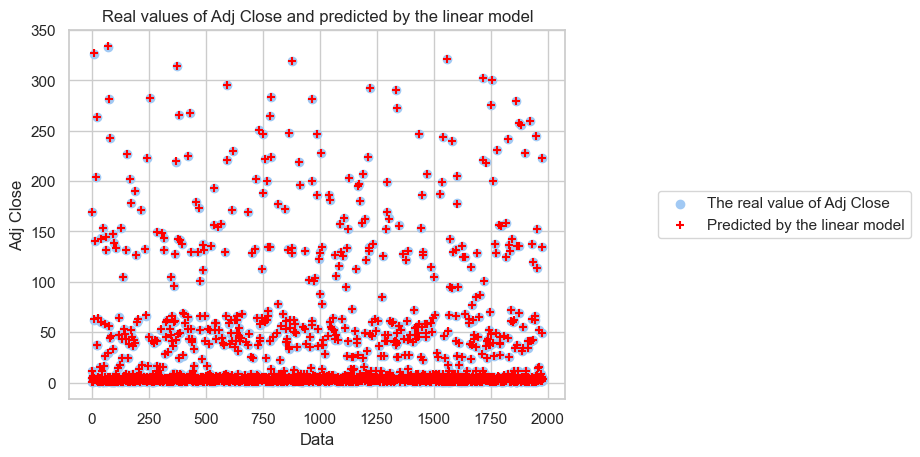

In [64]:
#graph of real and predicted values
plt.scatter(x, y_test, label = u'The real value of Adj Close', marker='o')
plt.scatter(x, y_pred, label = u'Predicted by the linear model', marker='+', c='red')
plt.title(u'Real values of Adj Close and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Data')
plt.ylabel(u'Adj Close')

In [65]:
def predict_with_model(model, x_test, y_test, model_name):
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2 = r2_score(y_test, model.predict(x_test))

    print('Model name: ' + model_name)
    print('Mean Absolute Error: {:.5f}'.format(mae))
    print('Mean Squared Error: {:.5f}'.format(mse))
    print('R2 Score: {:.5f}'.format(r2))
    print('Coefficients:', model.coef_)

In [66]:
predict_with_model(reg, X_test, y_test, 'Linear regression')

Model name: Linear regression
Mean Absolute Error: 0.10364
Mean Squared Error: 0.01891
R2 Score: 0.99999
Coefficients: [[ 0.01052897 -0.00521656 -0.00202868  0.99662781]]


In [67]:
lasso = Lasso(alpha=1, random_state=0)
lasso.fit(X_train, y_train)

predict_with_model(lasso, X_test, y_test, 'Lasso')

Model name: Lasso
Mean Absolute Error: 0.34962
Mean Squared Error: 0.95170
R2 Score: 0.99968
Coefficients: [0.62249063 0.1658142  0.         0.20259271]


In [68]:
ridge = Ridge(alpha=1, random_state=0)
ridge.fit(X_train, y_train)

predict_with_model(ridge, X_test, y_test, 'Ridge')

Model name: Ridge
Mean Absolute Error: 0.10365
Mean Squared Error: 0.01892
R2 Score: 0.99999
Coefficients: [[ 0.01083602 -0.00492733 -0.00225308  0.996256  ]]


Correlation matrix of features

<AxesSubplot:>

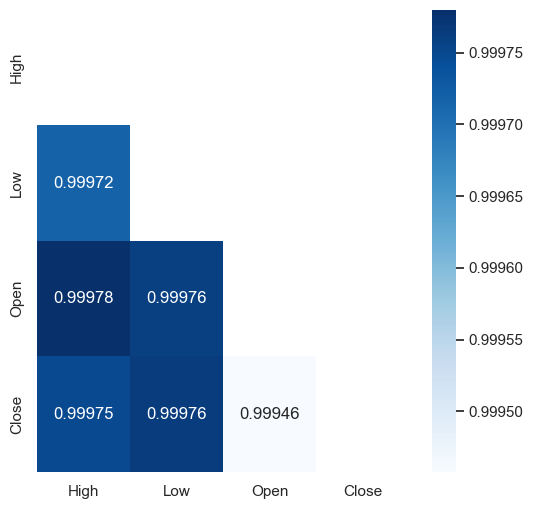

In [69]:
# Building a correlation matrix of features
dataset = data[['High', 'Low', 'Open', 'Close']]
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.5f', ax = ax, cmap = 'Blues')

Confidence intervals

In [70]:
#Confidence interval of regression coef
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))

              0         1
High   0.005726  0.034609
Low   -0.032728 -0.004058
Open  -0.013499  0.013373
Close  0.982453  1.009267


Distribution of residuals

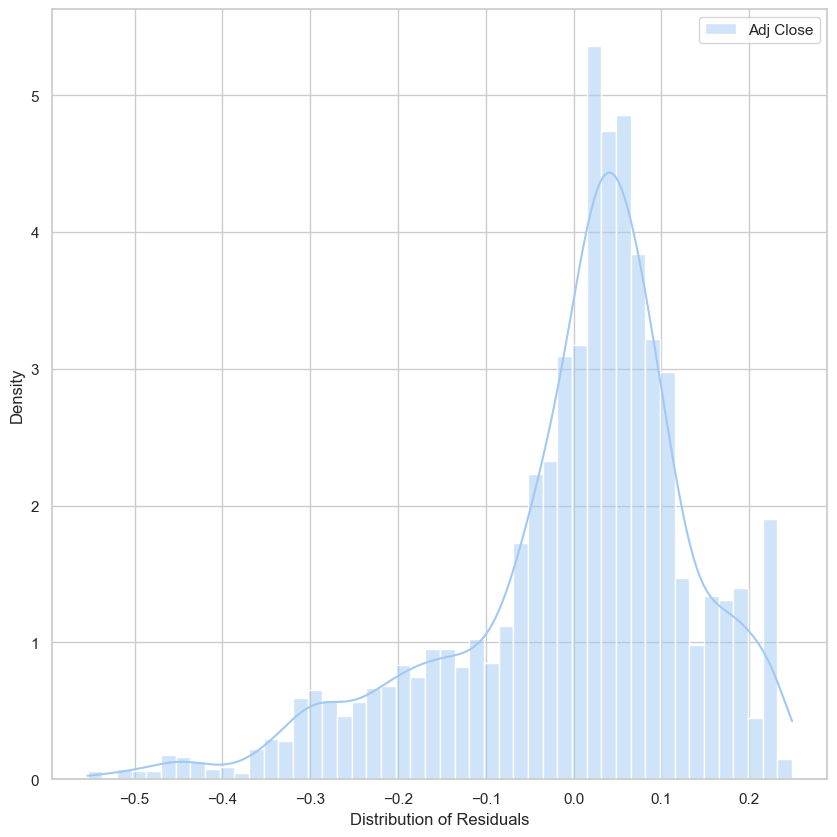

In [71]:
data_frame = y_train - reg.predict(X_train)

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

residuals = sns.histplot(data_frame, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')

plt.show()

In [72]:
args = scipy.stats.norm.fit(data_frame['Adj Close'])
kstest = scipy.stats.kstest(data_frame['Adj Close'], cdf='norm', args=args).pvalue
cramervonmises = scipy.stats.cramervonmises(data_frame['Adj Close'], cdf='norm', args=args).pvalue

print("Linear regression tests:")
print('Kolmogorov-Smirnov Test: {:.50f}'.format(kstest))
print('Cramer–Von Mises Test: {:.10f}'.format(cramervonmises))

Linear regression tests:
Kolmogorov-Smirnov Test: 0.00000000000000000000000000000000000000000000000001
Cramer–Von Mises Test: 0.0000000007
